# 1. Transformers

In [1]:
pip install transformers

     |████████████████████████████████| 2.0MB 5.6MB/s 
     |████████████████████████████████| 3.2MB 19.8MB/s 
     |████████████████████████████████| 890kB 50.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=d393774a63b9434dfb8df632591deefa201c8c0d56be95a3ea973270ac9147a2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [6]:
# Doc du lieu

train = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/train_nor_811.xlsx", index_col=False)
dev = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/valid_nor_811.xlsx", index_col=False)
test = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/test_nor_811.xlsx", index_col=False)

X_train = train['Sentence']
y_train = train['Emotion'].values

X_dev = train['Sentence']
y_dev = train['Emotion'].values

X_test = train['Sentence']
y_test = train['Emotion'].values

print(len(train))
print(len(dev))
print(len(test))

5548
686
693


In [21]:
dev.head(10)

,Unnamed: 0,Emotion,Sentence
0,941,Other,"tính tao tao biết , chẳng có chuyện gì có thể ..."
1,142,Enjoyment,"lại là lào cai , tự hào quê mình quá :))"
2,1164,Sadness,bị từ chối rồi
3,182,Enjoyment,tam đảo trời đẹp các mem à
4,868,Other,đọc bình luận của thằng đó không thiếu chữ nào 😂😂
5,236,Enjoyment,crush tao vẫn còn trinh nhé 😘
6,1229,Anger,nó nói không đúg ư . đg của nhà bà ư . nó đóg ...
7,355,Fear,gap kiểu này chắc đái ra quần quá
8,1538,Enjoyment,yêu em mọa mọa 😘😘
9,536,Sadness,có ai như tao không đọc đề thì quen nhưng lại ...


In [8]:
np.unique(y_test)

array(['Anger', 'Disgust', 'Enjoyment', 'Fear', 'Other', 'Sadness',
       'Surprise'], dtype=object)

In [7]:
# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels = 7)
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [9]:
# encoding label 
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [11]:
# encoding du lieu
train_encodings = tokenizer(X_train.to_list(), truncation=True, padding=True, max_length=40)
dev_encodings = tokenizer(X_dev.to_list(), truncation=True, padding=True, max_length=40)
test_encodings = tokenizer(X_test.to_list(), truncation=True, padding=True, max_length=40)

y_train_encoding = le.transform(y_train)
y_dev_encoding = le.transform(y_dev)
y_test_encoding = le.transform(y_test)

In [14]:
# Chuan bi data

train_dataset = BuildDataset(train_encodings, y_train_encoding)
dev_dataset = BuildDataset(dev_encodings, y_dev_encoding)
test_dataset = BuildDataset(test_encodings, y_test_encoding)

In [16]:
# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

In [17]:
# huan luyen mo hinh

trainer.train()

Step,Training Loss
500,1.577400
1000,1.062600


TrainOutput(global_step=1041, training_loss=1.3008033100168483, metrics={'train_runtime': 127.7197, 'train_samples_per_second': 8.151, 'total_flos': 710467740002880.0, 'epoch': 3.0, 'init_mem_cpu_alloc_delta': 47577, 'init_mem_gpu_alloc_delta': 0, 'init_mem_cpu_peaked_delta': 18306, 'init_mem_gpu_peaked_delta': 0, 'train_mem_cpu_alloc_delta': 572246, 'train_mem_gpu_alloc_delta': 2146854400, 'train_mem_cpu_peaked_delta': 368392500, 'train_mem_gpu_peaked_delta': 472097792})

In [18]:
# Du doan 
y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)

In [19]:
# Danh gia mo hinh
y_true = y_test_encoding

cf = confusion_matrix(y_true, y_pred)
print(cf)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

[[ 243  116    2   10   13    7    0]
 [  58  862   35   18   56   39    3]
 [   3   24 1427   11   57   34    2]
 [  13   31    8  224   17   22    3]
 [   6   65   56   15  827   35   17]
 [   2   28   29    6   39  840    3]
 [   2    9   21    2   35    2  171]]
F1 - micro: 0.8280461427541457
F1 - macro: 0.7941337806492952


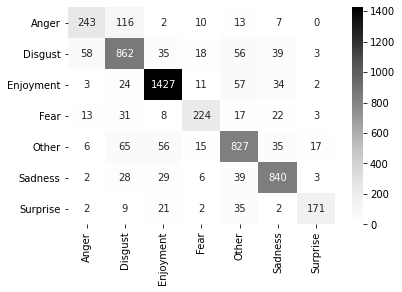

In [20]:
# Ve ma tran nham lan
df_cm = pd.DataFrame(cf, index = np.unique(y_train),
                  columns = np.unique(y_train))

sn.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 10})

# 2. Simple transformers

In [ ]:
! git clone https://github.com/NVIDIA/apex
! cd apex
! pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" /kaggle/working/apex/

In [ ]:
pip install simpletransformers

In [ ]:
import numpy as np
import pandas as pd

from simpletransformers.classification import ClassificationModel, ClassificationArgs
# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Doc du lieu

train = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/train_nor_811.xlsx", index_col=False)
dev = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/valid_nor_811.xlsx", index_col=False)
test = pd.read_excel("drive/MyDrive/Bài giảng/Xử lý ngôn ngữ tự nhiên cho Khoa học dữ liệu /Thuc hanh/Text Classification/dataset/test_nor_811.xlsx", index_col=False)

X_train = train['Sentence']
y_train = train['Emotion'].values

X_dev = train['Sentence']
y_dev = train['Emotion'].values

X_test = train['Sentence']
y_test = train['Emotion'].values

print(len(train))
print(len(dev))
print(len(test))

In [ ]:
# Xay dung mo hinh

# Cac tham so mo hinh
model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.evaluate_during_training = False
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 16
model_args.eval_batch_size = 8
model_args.labels_list = [0, 1, 2, 3, 4, 5, 6]
model_args.max_seq_length = 100
model_args.num_train_epochs = 5

# mo hinh
model = ClassificationModel('bert', 'bert-base-multilingual-cased', num_labels=7, args=model_args)

In [ ]:
# Huan luyen mo hinh
model.train_model(train, validation_data=dev)

In [ ]:
# Du doan mo hinh
result, model_outputs, wrong_predictions = model.eval_model(test)

label_true_test = test.labels.values
label_pred_test = model_outputs.argmax(axis=-1)

In [ ]:
# danh gia mo hinh
y_pred = label_pred_test.tolist()
y_true = label_true_test.tolist()

cf = confusion_matrix(y_true, y_pred)
print(cf)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(y_true, y_pred)
print("Accuracy: " + str(evaluation))